In [1]:
import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
##https://pynative.com/python-convert-json-string-to-dictionary-not-list/
##falta ver como usar diciconarios o pandas
# https://figshare.com/collections/Soccer_match_event_dataset/4415000/5

In [2]:
#descargar el json y pasarlo a un dataframe
# https://footballdata.wyscout.com/events-manual/
# manual de eventos de wyscout

with open('events_Germany.json') as json_data:
    eventos_ale = json.load(json_data)
df_eventos = pd.json_normalize(eventos_ale, sep = "_")

with open('competitions.json') as json_data:
    competencias = json.load(json_data)
df_competencias = pd.json_normalize(competencias, sep = "_")

with open('players.json') as json_data:
    jugadores = json.load(json_data)
df_jugadores = pd.json_normalize(jugadores, sep = "_")

with open('matches_Germany.json') as json_data:
    partidos = json.load(json_data)
df_partidos = pd.json_normalize(partidos, sep = "_")

## falta para teams


In [16]:
#como se ven 

print("Evento: \n",json.dumps(eventos_ale[0], indent=4),"\n",
     "Comeptencia: \n",json.dumps(competencias[0], indent=4),"\n",
     "Jugador: \n",json.dumps(jugadores[0], indent=4),"\n",
     "Partido: \n",json.dumps(partidos[0], indent=4),"\n"
     )



Evento: 
 {
    "eventId": 8,
    "subEventName": "Simple pass",
    "tags": [
        {
            "id": 1801
        }
    ],
    "playerId": 15231,
    "positions": [
        {
            "y": 50,
            "x": 50
        },
        {
            "y": 48,
            "x": 50
        }
    ],
    "matchId": 2516739,
    "eventName": "Pass",
    "teamId": 2446,
    "matchPeriod": "1H",
    "eventSec": 2.409745999999984,
    "subEventId": 85,
    "id": 179896442
} 
 Comeptencia: 
 {
    "name": "Italian first division",
    "wyId": 524,
    "format": "Domestic league",
    "area": {
        "name": "Italy",
        "id": "380",
        "alpha3code": "ITA",
        "alpha2code": "IT"
    },
    "type": "club"
} 
 Jugador: 
 {
    "passportArea": {
        "name": "Turkey",
        "id": "792",
        "alpha3code": "TUR",
        "alpha2code": "TR"
    },
    "weight": 78,
    "firstName": "Harun",
    "middleName": "",
    "lastName": "Tekin",
    "currentTeamId": 4502,
    "birth

In [40]:
## para ver cada categóría

print("Eventos:  \n",list(eventos_ale[0]), "\n Número de registros: ",len(eventos_ale))

print("Competencias: \n",list(competencias[0]), "\n Número de registros: ",len(df_competencias))
print("Jugadores: \n",list(jugadores[0]), "\n Número de registros: ", len(df_jugadores))
print("Partidos: \n",list(partidos[0]), "\n Número de registros: ", len(df_partidos))

#falta equipos, referees y coahces

Eventos:  
 ['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId', 'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id'] 
 Número de registros:  519407
Competencias: 
 ['name', 'wyId', 'format', 'area', 'type'] 
 Número de registros:  7
Jugadores: 
 ['passportArea', 'weight', 'firstName', 'middleName', 'lastName', 'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId', 'foot', 'shortName', 'currentNationalTeamId'] 
 Número de registros:  3603
Partidos: 
 ['status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc', 'winner', 'venue', 'wyId', 'label', 'date', 'referees', 'duration', 'competitionId'] 
 Número de registros:  306


## jugador con id = 0

- parece que el jugador con id 0  ha jugado em varios equipos diferentes. 
- pero con el 110, solo tiene un equipo.
- habbría que ver que onda con ese jugador de id 0

In [54]:
#ver eventos del jugador 0
#hay 37244 eventos
eventos = set()

count= 0
for i in range(len(eventos_ale)):
    if eventos_ale[i]['playerId'] == 0:
        #print(i,eventos_ale[i].values())
        eventos.add(eventos_ale[i]['subEventName'])
        count+=1
print(count)
print(eventos)

37244
{'', 'Launch', 'Goal kick', 'Corner', 'Foul', 'Air duel', 'Clearance', 'Ground defending duel', 'Whistle', 'Free Kick', 'Touch', 'Simple pass', 'Hand foul', 'Free kick cross', 'Ball out of the field', 'Ground attacking duel', 'Ground loose ball duel', 'Throw in'}


In [79]:
# ver eventos con ese playerId = 0
jugador_0 = df_eventos.loc[df_eventos['playerId'] == 0]
print(jugador_0['teamId'].unique())

#

jugadores_Id = df_eventos['playerId']
jugadores_Id.unique()
#son 474


[2444 2446 2443 2482 2445 2457 2462 2453 2463 2454 2449 2975 2481 2455
 2460 2451 2447 2450]


array([ 15231,  14786,  14803,  14768,  40657,  15811,  14732, 209091,
        89559,  20475, 228768,  14724, 388267, 134383,      0,  14817,
       224593,  14726, 105619, 165425,  14795,  14736, 258253, 146583,
        49859,  16110,  14727,  14718, 231139,  16025, 272440, 223516,
        15200,  65055, 263614,  49997,  14842,  15719, 367621,  15012,
       149389, 221333,  55990,  51217,  82340,  15292, 253822,  11095,
        25589,  16027,  14979,  69411,  14692, 134397,  15193,  17136,
        56424,  15141,  82518, 284580,  99410,  15020,  14905,  14762,
        15032,   7904,  14754, 254649,  15125,   8309,  15771,  15276,
       340646, 284469,  15015, 328131,  16094, 349099,  54579,  14885,
       173212,  14715, 233910,  94650, 275121,  15487, 216074,  49856,
        14998,  19525, 255732, 146569,  15139,   3535,  15131,  15430,
        26021, 228765, 365880,  14929,  15503,    110, 272378, 136011,
        25512,  20591,  55951,  14734,  20402,  15533,  14772,  51689,
      

## ver diferentes eventos

- eventos mas frecuentes: duelos, pases y el balón saliendo de la cancha
- menos frecuentes: penales, tarjetas, "smart passes" y saved balls


In [5]:
#para ver las diferentes columnas y cuantos registros hay
print(list(eventos_ale[0]), len(eventos_ale))

#Group by para contar cuantos eventos  son de que tipo junto con su subvento
count_sub_eventos = df_eventos.groupby(['eventName','subEventName']).size()
print(count_sub_eventos)

['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId', 'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id'] 519407
eventName                subEventName           
Duel                     Air duel                    29448
                         Ground attacking duel       44342
                         Ground defending duel       44165
                         Ground loose ball duel      26228
Foul                     Foul                         8115
                         Hand foul                     311
                         Late card foul                 42
                         Out of game foul               68
                         Protest                        65
                         Simulation                     10
                         Time lost foul                 32
                         Violent Foul                   13
Free Kick                Corner                       2891
                         Free Kick 

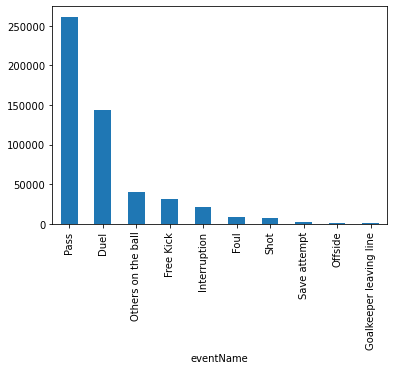

In [8]:
# frecuencia de eventos

#count_eventos y count_sub_eventos son series
count_eventos = df_eventos.groupby('eventName').size()
count_eventos.sort_values(ascending=False).plot.bar()



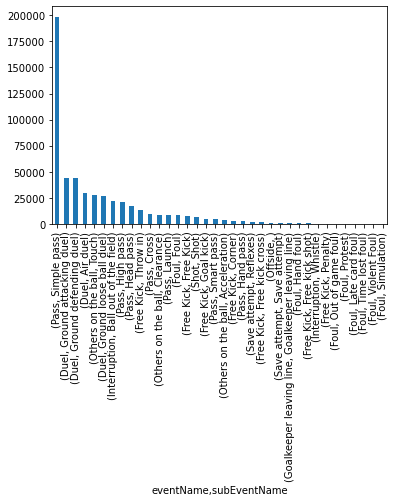

In [9]:
count_sub_eventos.sort_values(ascending=False).plot.bar()

In [23]:
#distribución de eventos x partido

#como se ve un partido promedio (agregaciones de cada partido)
eventos_x_partido = df_eventos.groupby(['matchId','eventName']).size()
eventos_x_partido

partidos = df_eventos.groupby('matchId').size()

eventos_x_partido

matchId  eventName              
2516739  Duel                       303
         Foul                        29
         Free Kick                   99
         Goalkeeper leaving line      3
         Interruption                64
                                   ... 
2517044  Offside                      4
         Others on the ball         125
         Pass                       817
         Save attempt                10
         Shot                        24
Length: 3026, dtype: int64

In [ ]:
#ver eventos de un partido en específico
#existe partido con matchId 2516739




In [49]:
# todo: ver que significa tag


#parece que BooF y GLdf tienen el mismo número de eventos

# 'Ball out of the field'
count_BooF= 0
# 'Ground loose ball duel'
count_GLbd= 0
# 'Free Kick'
count_FK=0
for i in range(len(eventos_ale)):
    if eventos_ale[i]['subEventName'] == 'Ball out of the field':
        #print(i,eventos_ale[i].values())
        count_BooF+=1
    if eventos_ale[i]['subEventName'] == 'Ball out of the field':
        count_GLbd+=1
    if eventos_ale[i]['subEventName'] == 'Free Kick':
        count_FK+=1
print(" De Ball out of field: ",count_BooF,"\n",
     "De Ground loose ball duel: ",count_GLbd,"\n",
     "De Free Kick: ",count_FK)
#hay 37244 eventos con jugador 0
# pero de este hay un total de 50934





 De Ball out of field:  21588 
 De Ground loose ball duel:  21588 
 De Free Kick:  7748


In [12]:
df_eventos.loc[df_eventos['subEventName'] == 'Simple pass']


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446
...,...,...,...,...,...,...,...,...,...,...,...,...
519387,8,Simple pass,[{'id': 1801}],94831,"[{'y': 28, 'x': 60}, {'y': 18, 'x': 47}]",2517044,Pass,2463,2H,2798.169590,85,251206858
519388,8,Simple pass,[{'id': 1801}],18669,"[{'y': 18, 'x': 47}, {'y': 36, 'x': 32}]",2517044,Pass,2463,2H,2801.305189,85,251206859
519389,8,Simple pass,[{'id': 1801}],16843,"[{'y': 36, 'x': 32}, {'y': 62, 'x': 32}]",2517044,Pass,2463,2H,2804.460822,85,251206860
519390,8,Simple pass,[{'id': 1801}],275384,"[{'y': 62, 'x': 32}, {'y': 88, 'x': 66}]",2517044,Pass,2463,2H,2807.540961,85,251206861


In [11]:
# ejemplo: df.loc[df['column_name'] == some_value]
df_eventos.loc[df_eventos['playerId'] == 14817]
# se ve que el jugador juega en el equipo 2444
# luego checar 
df_jugadores.loc[df_jugadores['lastName'] == 'Lewandowski']


#parece que wyId de jugadores es el playerId de los eventos. parece que lewandowski es el 14817

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
29,8,Head pass,[{'id': 1801}],14817,"[{'y': 17, 'x': 34}, {'y': 47, 'x': 37}]",2516739,Pass,2444,1H,65.050881,82,179896486
39,7,Touch,[],14817,"[{'y': 43, 'x': 88}, {'y': 52, 'x': 64}]",2516739,Others on the ball,2444,1H,85.760029,72,179896500
86,1,Air duel,"[{'id': 701}, {'id': 1802}]",14817,"[{'y': 92, 'x': 45}, {'y': 80, 'x': 63}]",2516739,Duel,2444,1H,209.497324,10,179896555
103,7,Touch,[],14817,"[{'y': 56, 'x': 87}, {'y': 66, 'x': 83}]",2516739,Others on the ball,2444,1H,245.980693,72,179896572
223,1,Air duel,"[{'id': 703}, {'id': 1801}]",14817,"[{'y': 30, 'x': 63}, {'y': 29, 'x': 62}]",2516739,Duel,2444,1H,720.028499,10,179896685
...,...,...,...,...,...,...,...,...,...,...,...,...
506168,8,Simple pass,[{'id': 1801}],14817,"[{'y': 47, 'x': 76}, {'y': 52, 'x': 81}]",2517036,Pass,2444,2H,2227.486346,85,251209038
506213,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",14817,"[{'y': 56, 'x': 75}, {'y': 62, 'x': 77}]",2517036,Duel,2444,2H,2369.448804,11,251209064
506214,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",14817,"[{'y': 62, 'x': 77}, {'y': 62, 'x': 83}]",2517036,Duel,2444,2H,2370.076537,13,251209065
506253,8,Simple pass,[{'id': 1801}],14817,"[{'y': 46, 'x': 80}, {'y': 45, 'x': 87}]",2517036,Pass,2444,2H,2532.252144,85,251209094


## Esta parte es para poder graficar pases en el camp

-para esta prueba, decidí graficar los pases de un jugador en toda la tamporada


In [87]:
#Plotear jugadas

import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch


# código de: https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

#definir la función que dibuja el campo de futbol
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    #antes heigh estaba a 80
    Pitch = Rectangle([0,0], width = 100, height = 120, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)


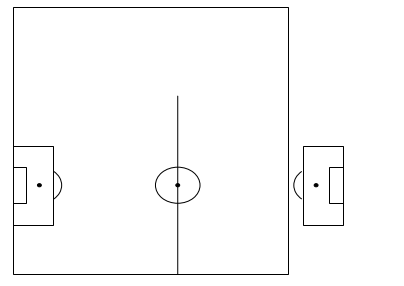

In [88]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 120)
plt.xlim(-2, 140)
plt.axis('off')
plt.show()

In [97]:
# conseguir los passes de Kimmich
display(df_jugadores.loc[df_jugadores['lastName'] == 'Kimmich'])
# el wyid de Kimmich 224593
# el jugador debería ser del equipo 2444

display(df_eventos.loc[df_eventos['playerId'] == 224593].head())

# como subEventName se podría graficar entre smart pass y Simple pass
eventos_JK = df_eventos[df_eventos['playerId'] == 224593]
pases_JK = eventos_JK.loc[eventos_JK['subEventName'] == 'Simple pass'].head(100)

display(passes_JK)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
2179,70,Joshua,,Kimmich,2444,1995-02-08,176,224593,right,J. Kimmich,...,276,DEU,DE,DF,DEF,Defender,Germany,276,DEU,DE


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
33,8,Simple pass,[{'id': 1801}],224593,"[{'y': 92, 'x': 34}, {'y': 75, 'x': 45}]",2516739,Pass,2444,1H,72.890486,85,179896491
42,8,Simple pass,[{'id': 1801}],224593,"[{'y': 96, 'x': 68}, {'y': 78, 'x': 68}]",2516739,Pass,2444,1H,96.077003,85,179896503
65,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",224593,"[{'y': 95, 'x': 73}, {'y': 90, 'x': 86}]",2516739,Duel,2444,1H,157.325942,11,179896534
68,1,Ground attacking duel,"[{'id': 703}, {'id': 1801}]",224593,"[{'y': 90, 'x': 86}, {'y': 88, 'x': 93}]",2516739,Duel,2444,1H,159.755989,11,179896535
69,7,Acceleration,[{'id': 1802}],224593,"[{'y': 88, 'x': 93}, {'y': 86, 'x': 99}]",2516739,Others on the ball,2444,1H,160.716365,70,179896539


NameError: name 'passes_JK' is not defined

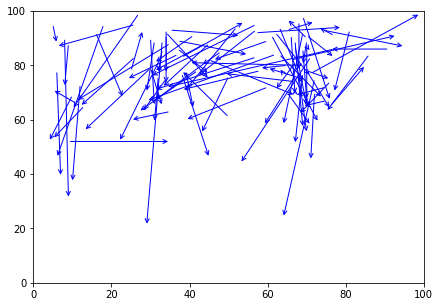

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
#draw_pitch(ax)

#antes estaba como:  for i in range(len(passes_JK)):   pero arroja IndexError: single positional indexer is out-of-bounds

for i in range(len(pases_JK)):
    # can also differentiate by color
    color = "blue" #if pases_JK.iloc[i]['matchPeriod'] == '1H' else "red"
    ax.annotate("", xy = (pases_JK.iloc[i]['positions'][1].get('x'), pases_JK.iloc[i]['positions'][1].get('y')), xycoords = 'data',
               xytext = (pases_JK.iloc[i]['positions'][0].get('x'), pases_JK.iloc[i]['positions'][0].get('y')), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

### cosas de los datos

- jugador con id 0, tiene eventos en todos los equipos con ciertos subeventos
- en evntos playerId es igual a wyId del dataset de jugadores
- sobre posicion, las primeras coordenadas son de donde empieza la jugada y las otras de donde terminan
- ver que significa tag

In [91]:
#para ver que significan los tags
#  el 1081 se ve bastante
tag1 = set()
tag2 = set()
tag3 = set()
tag4 = set()

tags_eventos = df_eventos['tags']

for evento in tags_eventos:
    if len(evento) == 1:
        tag1.add(evento[0].get('id'))
    if len(evento) == 2:
        tag2.add(evento[0].get('id'))
        tag2.add(evento[1].get('id'))
    if len(evento) == 3:
        tag3.add(evento[0].get('id'))
        tag3.add(evento[1].get('id'))
        tag3.add(evento[2].get('id'))
    if len(evento) == 4:
        tag4.add(evento[0].get('id'))
        tag4.add(evento[1].get('id'))
        tag4.add(evento[2].get('id'))
        tag4.add(evento[3].get('id'))
    
        
print("Los tags diferentes que solo tienen uno son: \n",tag1)
print("Los tags diferentes que solo tienen dos son: \n",tag2)
print("Los tags diferentes que solo tienen tres son: \n",tag3)
print("Los tags diferentes que solo tienen cuatro son: \n",tag4)



Los tags diferentes que solo tienen uno son: 
 {1701, 1702, 1703, 102, 1801, 1802, 201, 1901, 302, 2001, 1301, 1302, 1401}
Los tags diferentes que solo tienen dos son: 
 {901, 1801, 1802, 401, 402, 403, 1301, 1302, 801, 301, 302, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 2101, 701, 702, 703, 201, 2001, 101, 102, 1001, 1901, 501, 502, 503, 504, 1401}
Los tags diferentes que solo tienen tres son: 
 {901, 1801, 1802, 401, 402, 403, 1302, 801, 1703, 301, 302, 1201, 1202, 1203, 1204, 1205, 2101, 1207, 1206, 1209, 1210, 1211, 1212, 701, 702, 703, 1216, 1601, 1214, 1215, 1213, 1219, 1208, 1221, 201, 2001, 601, 602, 101, 102, 1001, 1901, 501, 502, 503, 504, 1401}
Los tags diferentes que solo tienen cuatro son: 
 {901, 1801, 1802, 401, 402, 403, 801, 301, 302, 1201, 1202, 1203, 1204, 2101, 1206, 1205, 1208, 1207, 1210, 1211, 1212, 701, 1214, 1215, 703, 1601, 1216, 1219, 702, 1213, 1221, 1223, 1209, 201, 1217, 1218, 1220, 1101, 1102, 1222, 2001, 601, 602, 101, 1901, 501, 502, 503, 50

In [92]:
tags: a list of event tags, each describing additional information about the event 
    (e.g., accurate). Each event type is associated with a different set of tags (see Table 2). 
    The Wyscout documentation provides a mapping of the tag identifiers to the corresponding names and 
    descriptions (https://apidocs.wyscout.com/);

SyntaxError: invalid syntax (<ipython-input-92-30da8ae4a7c3>, line 1)

In [93]:
penales = df_eventos.loc[df_eventos['subEventName'] == 'Penalty'].head(100)
# parece que los penales no coinciden en coordenadas, parece que es por eroor humano y no por el tamaño de la cancha
#  falta investigar
#  

positions = df_eventos['positions']
coord1 = []

for evento in eventos_ale:
    if len(evento['positions']) != 2:
        temp = [evento['positions'], evento['eventName'], evento['subEventName']]
        coord1.append(temp)
        
coord1

[[[{'y': 86, 'x': 65}], 'Foul', 'Time lost foul'],
 [[{'y': 69, 'x': 25}], 'Foul', 'Protest'],
 [[{'y': 44, 'x': 31}], 'Foul', 'Protest'],
 [[{'y': 54, 'x': 75}], 'Foul', 'Late card foul'],
 [[{'y': 82, 'x': 75}], 'Foul', 'Late card foul'],
 [[{'y': 91, 'x': 90}], 'Foul', 'Protest'],
 [[{'y': 96, 'x': 32}], 'Foul', 'Time lost foul'],
 [[{'y': 48, 'x': 45}], 'Foul', 'Protest'],
 [[{'y': 93, 'x': 64}], 'Foul', 'Protest'],
 [[{'y': 46, 'x': 4}], 'Foul', 'Time lost foul'],
 [[{'y': 17, 'x': 63}], 'Foul', 'Protest'],
 [[{'y': 15, 'x': 77}], 'Foul', 'Protest'],
 [[{'y': 36, 'x': 40}], 'Foul', 'Late card foul'],
 [[{'y': 53, 'x': 84}], 'Foul', 'Protest'],
 [[{'y': 96, 'x': 93}], 'Foul', 'Time lost foul'],
 [[{'y': 94, 'x': 38}], 'Foul', 'Protest'],
 [[{'y': 65, 'x': 66}], 'Foul', 'Time lost foul'],
 [[{'y': 36, 'x': 31}], 'Foul', 'Late card foul'],
 [[{'y': 77, 'x': 22}], 'Foul', 'Late card foul'],
 [[{'y': 9, 'x': 28}], 'Foul', 'Late card foul'],
 [[{'y': 6, 'x': 58}], 'Foul', 'Protest'],
 [